In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
city_hour = pd.read_csv('../data/city_hour.csv')

In [3]:
city_hour

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [4]:
data = city_hour.copy()

In [5]:
data['Datetime'] = pd.to_datetime(data['Datetime'], infer_datetime_format = True)

In [6]:
data2 = data[data['City'].isin(['Mumbai', 'Bengaluru', 'Chennai', 'Lucknow', 'Delhi'])]

In [7]:
data2 = data2.reset_index(drop = True)

In [8]:
data2.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
for c in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']:
    data2[c + '_Indicator'] = np.where(~data2[c].isna(), 1, 0)

In [16]:
data2.groupby('City').agg({'PM2.5_Indicator': 'mean',
                           'PM10_Indicator': 'mean', 
                           'NO_Indicator': 'mean',
                           'NO2_Indicator': 'mean',  
                           'CO_Indicator': 'mean',   
                           'SO2_Indicator': 'mean',  
                           'AQI_Indicator': 'mean'}).reset_index()

,City,PM2.5_Indicator,PM10_Indicator,NO_Indicator,NO2_Indicator,CO_Indicator,SO2_Indicator,AQI_Indicator
0,Bengaluru,0.903905,0.772016,0.987073,0.987135,0.903511,0.984541,0.944078
1,Chennai,0.931192,0.120539,0.974290,0.973938,0.976490,0.973377,0.926482
2,Delhi,0.992219,0.949763,0.993816,0.993152,0.992447,0.940820,0.989666
3,Lucknow,0.934429,0.000000,0.972153,0.973274,0.828000,0.945281,0.932561
4,Mumbai,0.377324,0.360952,0.365185,0.363795,0.960823,0.376992,0.377054


In [11]:
data2.groupby('City').agg({'Datetime': 'min'}).reset_index()

,City,Datetime
0,Bengaluru,2015-01-01 01:00:00
1,Chennai,2015-01-01 01:00:00
2,Delhi,2015-01-01 01:00:00
3,Lucknow,2015-01-01 01:00:00
4,Mumbai,2015-01-01 01:00:00


In [12]:
data2.groupby('City').agg({'Datetime': 'max'}).reset_index()

,City,Datetime
0,Bengaluru,2020-07-01
1,Chennai,2020-07-01
2,Delhi,2020-07-01
3,Lucknow,2020-07-01
4,Mumbai,2020-07-01


In [14]:
data2['City'].value_counts(dropna = False).reset_index()

,City,count
0,Bengaluru,48192
1,Chennai,48192
2,Delhi,48192
3,Lucknow,48192
4,Mumbai,48192


In [15]:
data2.to_csv('../data/city_hour_preprocessed.csv', index = False)

In [18]:
data2.head(5)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,NO2_Indicator,NOx_Indicator,NH3_Indicator,CO_Indicator,SO2_Indicator,O3_Indicator,Benzene_Indicator,Toluene_Indicator,Xylene_Indicator,AQI_Indicator
0,Bengaluru,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,...,1,1,1,1,1,1,1,1,0,0
1,Bengaluru,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,...,1,1,1,1,1,1,0,1,0,0
2,Bengaluru,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,...,1,1,1,1,1,1,0,1,0,0
3,Bengaluru,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,...,1,1,1,1,1,1,0,1,0,0
4,Bengaluru,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,...,1,1,1,1,1,1,0,1,0,0


In [21]:
data_bgl = data2[data2['City'] == 'Bengaluru']

In [23]:
import matplotlib.pyplot as plt

In [ ]:
tslm package

In [ ]:
TIME SERIES ANALYSIS - stationarity (adf and kpss), seasonality (stl decomp) - trend, residual, original, seasonality
cyclicity , periodogram, 
box-cox transformation - make stationary
train-test split (2015-2019/2020)
model - auto arima (lambda = auto/it will give lambda value. if its 0 then log transformation. negative or positive - box-cox transformation) / do wilk shapiro test for residual analysis
missing value - rolling average, circle average
error metrics - rmse, mse, mape, aic, bic
aic negative is good
bic negative is good
dynamic forecast - dynamic forecasting is forecasting in future
cross validation - sliding window or exapanding window approach

VAR - vector autoregression
Holtz winters for smoothing - ETS (exponential time series)
arima, sarima, auto arima, arch garch, lstm, deep learning, arimax, xreg ()

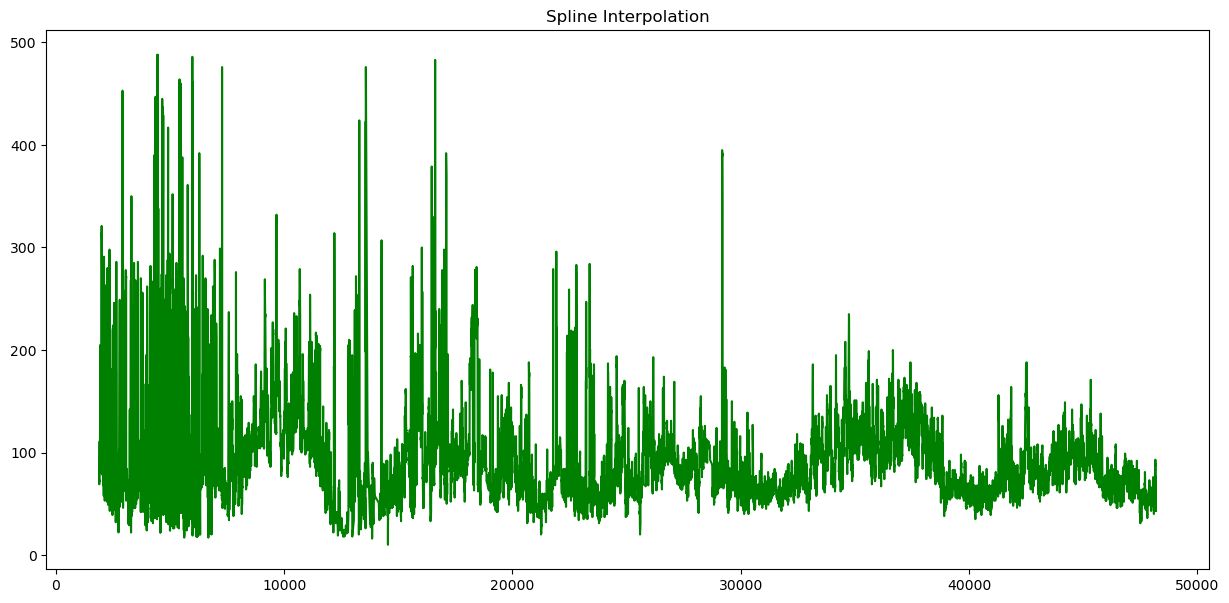

In [24]:
plt.rcParams['figure.figsize']=(15,7)
 
# on our data, impute the missing values using the interpolation techniques and specifically, the lineare method
data_bgl['AQI_Spline']= data_bgl['AQI'].interpolate(option='spline')
 
# plot the complete dataset
plt.plot(data_bgl['AQI_Spline'], color='green')
 
plt.title('Spline Interpolation')
plt.show()

In [25]:
data_bgl['AQI_Spline'].isnull().sum()

1898

In [ ]:
# Summary statistics
summary = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

summary, missing_values

In [ ]:
import matplotlib.pyplot as plt

# Convert Datetime column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Filter data for a single city, e.g., 'Ahmedabad'
city_data = data[data['City'] == 'Ahmedabad']

# Plot AQI over time
plt.figure(figsize=(14, 7))
plt.plot(city_data['Datetime'], city_data['AQI'])
plt.title('AQI Over Time for Ahmedabad')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.show()

In [ ]:
# Fill missing AQI values using forward fill
data['AQI'] = data['AQI'].fillna(method='ffill')

# Check if there are any remaining missing values
missing_aqi = data['AQI'].isnull().sum()
missing_aqi

In [ ]:
# Identify outliers using the IQR method
Q1 = data['AQI'].quantile(0.25)
Q3 = data['AQI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['AQI'] >= lower_bound) & (data['AQI'] <= upper_bound)]

# Plot AQI over time again for 'Ahmedabad' after removing outliers
city_data = data[data['City'] == 'Ahmedabad']
plt.figure(figsize=(14, 7))
plt.plot(city_data['Datetime'], city_data['AQI'])
plt.title('AQI Over Time for Ahmedabad (No Outliers)')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Datetime as index for decomposition
city_data.set_index('Datetime', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(city_data['AQI'], model='additive', period=24)  # Assuming daily seasonality

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(city_data['AQI'].dropna())
adf_result

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(city_data['AQI'].dropna(), lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(city_data['AQI'].dropna(), lags=50, ax=plt.gca())
plt.show()

In [ ]:
# Split the data into training and test sets
train_size = int(len(city_data) * 0.8)
train, test = city_data.iloc[:train_size], city_data.iloc[train_size:]

train.shape, test.shape

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(train['AQI'], order=(5, 1, 0))  # Example order, needs tuning
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()
model_summary

In [ ]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['AQI'], forecast)
mae = mean_absolute_error(test['AQI'], forecast)
rmse = mse ** 0.5

mse, mae, rmse

In [ ]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# ACF of residuals
plt.figure(figsize=(14, 7))
plot_acf(residuals, lags=50)
plt.show()

In [ ]:
# Forecast future values
forecast = model_fit.get_forecast(steps=len(test))
forecast_index = test.index
forecast_values = forecast.predicted_mean

# Plot the forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index, test['AQI'], label='Test')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.legend()
plt.title('AQI Forecasting')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.show()